# Project Name:
Machine Learning Minor Project

# Problem statement: 
Create a classification model to predict the gender (male or 
female) based on different acoustic parameters# 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
dataset = pd.read_csv('voice.csv')
dataset=dataset.replace(to_replace="male",value=1)
dataset=dataset.replace(to_replace="female",value=0)
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


# Remove/handle null values (if any)

In [50]:
dataset.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

# PERCENTAGE DISTRIBUTION PIE CHART

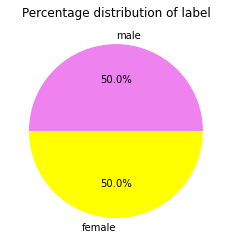

In [42]:
count = dataset.pivot_table(columns=['label'], aggfunc='size')
gender = [count[0], count[1]]
pie_labels = ["male", "female"]
colors = ['VIOLET', 'YELLOW']
plt.pie(gender, labels=pie_labels, autopct="%1.1f%%", colors=colors)
plt.title("Percentage distribution of label")
plt.show()

In [43]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


# Considering all the features as independent feature and label as dependent feature, 
split the dataset training and testing data with test size=20%

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [45]:
print(y_train)

[1 1 1 ... 0 0 0]


In [47]:
print(X_train)

[[0.18387449 0.05859674 0.20079681 ... 4.6171875  4.59375    0.14237883]
 [0.17046285 0.07554767 0.16976772 ... 7.         6.9921875  0.17001862]
 [0.160308   0.05892514 0.165      ... 3.6015625  3.515625   0.29919192]
 ...
 [0.13478527 0.08202021 0.14205279 ... 3.875      3.8515625  0.15377185]
 [0.23690896 0.02960468 0.24192771 ... 9.7265625  9.703125   0.12318841]
 [0.18666371 0.03386303 0.19107078 ... 9.28125    9.2578125  0.13535262]]


In [48]:
print(y_test)

[0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1
 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1
 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0
 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0
 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0
 0 0 1 1 0 1 1 0 0 1 1 1 

In [49]:
print(X_test)

[[ 0.19528383  0.03766286  0.19572816 ...  7.4296875   7.2890625
   0.09409376]
 [ 0.17948993  0.06042679  0.1815235  ...  4.546875    4.5234375
   0.11371693]
 [ 0.22159779  0.02752513  0.22067797 ...  4.125       3.9140625
   0.10689732]
 ...
 [ 0.20845323  0.03525388  0.2039604  ... 15.234375   15.0703125
   0.07029549]
 [ 0.16565888  0.06026657  0.17485597 ...  4.3203125   4.25
   0.08555453]
 [ 0.19145471  0.03762533  0.19155624 ...  9.0234375   9.
   0.13564645]]


# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\nisch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [59]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
L0GISTIC_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[310  63]
 [ 87 332]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       373
           1       0.84      0.79      0.82       419

    accuracy                           0.81       792
   macro avg       0.81      0.81      0.81       792
weighted avg       0.81      0.81      0.81       792



#  Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [61]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
DECICION_TREE_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[310  63]
 [ 87 332]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       373
           1       0.84      0.79      0.82       419

    accuracy                           0.81       792
   macro avg       0.81      0.81      0.81       792
weighted avg       0.81      0.81      0.81       792



# SVM Classifier

In [63]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [64]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
SVM_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[320  53]
 [  5 414]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       373
           1       0.89      0.99      0.93       419

    accuracy                           0.93       792
   macro avg       0.94      0.92      0.93       792
weighted avg       0.93      0.93      0.93       792



# Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [67]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
RANDOM_FOREST_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[367   6]
 [ 13 406]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       373
           1       0.99      0.97      0.98       419

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



# KNN Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
KNN_CLASSIFIER_ACCURACY = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[367   6]
 [ 13 406]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       373
           1       0.99      0.97      0.98       419

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



# BEST ACCURACY

In [71]:
print("LOGISTIC REGRESSION CLASSIFIER = ",L0GISTIC_CLASSIFIER_ACCURACY)
print("DECISION TREE CLASSIFIER = ",DECICION_TREE_CLASSIFIER_ACCURACY)
print("SVM CLASSIFIER = ",SVM_CLASSIFIER_ACCURACY)
print("RANDOM FOREST CLASSIFIER = ",RANDOM_FOREST_CLASSIFIER_ACCURACY)
print("KNN CLASSIFIER = ",KNN_CLASSIFIER_ACCURACY)

LOGISTIC REGRESSION CLASSIFIER =  0.8106060606060606
DECISION TREE CLASSIFIER =  0.8106060606060606
SVM CLASSIFIER =  0.9267676767676768
RANDOM FOREST CLASSIFIER =  0.976010101010101
KNN CLASSIFIER =  0.976010101010101


# BEST ACCURACY IN KMN AND FOREST CLASSIFER